# Atari Game (Pac-Man)

### If not working install in terminal

#### Note from Axtan: This simulation can be run in a custom-made terminal environment and needs Matplotlib installed and scipy in the terminal, not just the notebook. The simulation might not run as well on cloud services, and might not work without the custom terminal (I haven't tested it outside this environment yet)

#### Question

Each time Pac-Man eats a power pellet, there’s a 60% chance he catches at least one ghost before the effect wears off. If he eats 8 power pellets in a game, what is the probability that he catches ghosts 5 or more times?

#### Description

I need to assume that the player has 3 lives per game.

I need to find how many dots there are on a Pac-Man map, then simulate that

One trial of my simulation will consist of the player picking up all the dots and finding if they catch 5 ghosts or not

The success outcome is that the player dies a total of 3 times; failure is any number that isn't 3 times.

A possible bias in my data is that in my code, the chance that Pac-Man “catches a ghost” is purely based on a random 60% chance per pellet.
However, in the real game, this chance isn’t actually random — it depends on:

In [2]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]
!pip install matplotlib
!pip install scipy

### Each time Pac-Man eats a power pellet, there’s a 60% chance he catches at least one ghost. If he eats 8 power pellets, what is the probability he catches ghosts 5 times.

In [2]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

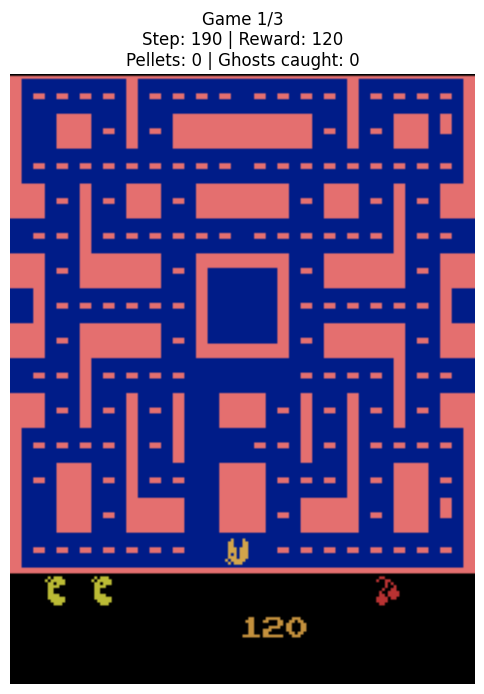

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time
import numpy as np
import random
from scipy.stats import binom

# --- Parameters ---
p_catch = 0.6             # chance to catch a ghost per pellet
n_pellets = 8              # number of pellets (approx, since Ms. Pac-Man has more)
games_to_visualize = 3
games_to_simulate = 2000    # fewer visual runs for speed
power_mode_duration = 80   # frames power mode stays active

# --- Environment setup ---
env = gym.make('ALE/MsPacman-v5', render_mode='rgb_array')
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')
display(fig)

# Tracking stats
total_ghosts_caught = []
total_pellets_eaten = []

for game in range(games_to_visualize):
    observation, info = env.reset()
    total_reward = 0
    ghosts_caught = 0
    pellets_eaten = 0
    power_mode = False
    power_timer = 0

    for step in range(1000):
        action = env.action_space.sample()
        prev_reward = total_reward
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # Detect power pellet (rough heuristic)
        if reward == 50:  # typical pellet reward in Ms. Pac-Man
            pellets_eaten += 1
            power_mode = True
            power_timer = power_mode_duration

        # While power mode is active, Pac-Man might catch ghosts
        if power_mode:
            # Simulate ghost encounters
            if random.random() < p_catch:
                ghosts_caught += 1
                total_reward += 200  # simulate bonus points for ghost
            power_timer -= 1
            if power_timer <= 0:
                power_mode = False

        # Visualization
        clear_output(wait=True)
        ax.clear()
        ax.imshow(env.render())
        ax.set_title(
            f"Game {game+1}/{games_to_visualize}\n"
            f"Step: {step} | Reward: {total_reward:.0f}\n"
            f"Pellets: {pellets_eaten} | Ghosts caught: {ghosts_caught}"
        )
        ax.axis('off')
        display(fig)
        time.sleep(0.02)

        if terminated or truncated:
            break

    total_ghosts_caught.append(ghosts_caught)
    total_pellets_eaten.append(pellets_eaten)

plt.close()
env.close()

# --- Empirical Probability (from collected data) ---
target_ghosts = 5
empirical_prob = np.mean(np.array(total_ghosts_caught) == target_ghosts)

# --- Theoretical Probability (Binomial) ---
theoretical_prob = binom.pmf(target_ghosts, n_pellets, p_catch)

# --- Results ---
print("===== BINOMIAL DISTRIBUTION RESULTS =====")
print(f"Theoretical P(EXACTLY {target_ghosts} ghosts): {theoretical_prob:.4f}")
print(f"Empirical P(EXACTLY {target_ghosts} ghosts): {empirical_prob:.4f}")
print(f"Average ghosts caught per game: {np.mean(total_ghosts_caught):.2f}")
print(f"Average pellets eaten per game: {np.mean(total_pellets_eaten):.2f}")


In [5]:
import matplotlib.pyplot as plt
print("Matplotlib is installed!")


Matplotlib is installed!


In [7]:
import sys
print(sys.executable)


C:\Users\agilbert3\AppData\Local\anaconda3\envs\gym_env\python.exe


In [6]:
from scipy import stats
print("Scipy is installed and stats is ready!")


Scipy is installed and stats is ready!
